In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import numpy as np
import re

import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [3]:
data = pd.read_csv("./csv/train_data.csv", sep=",")
result = pd.read_csv("./csv/result_data.csv", sep=",")
data = data.sort_values('race_id',ascending=False)
result = result.sort_values('race_id',ascending=False)
odds_1 = pd.read_csv('./csv/cleaned_race_data.csv', sep=",")

In [4]:
data_train, data_test =train_test_split(data, test_size=0.3, random_state=0)
result_train, result_test =train_test_split(result, test_size=0.3, random_state=0)

In [5]:
odds_1 = pd.merge(odds_1,result_test,on="race_id")

In [6]:
odds = odds_1["tansyo"]
horse_number_first = odds_1["horse_number_first"]

In [7]:
data_train.drop(['race_id'], axis=1, inplace=True)
data_test.drop(['race_id'], axis=1, inplace=True)
result_train.drop(['race_id'], axis=1, inplace=True)
result_test.drop(['race_id'], axis=1, inplace=True)

In [8]:
data_train.loc[:,:] = scaler.fit_transform(data_train)
data_test.loc[:,:] = scaler.fit_transform(data_test)
result_train.loc[:,:] = scaler.fit_transform(result_train)
result_test.loc[:,:] = scaler.fit_transform(result_test)

In [11]:
data_train.shape

(184, 2547)

In [10]:
result_train.shape

(184, 17)

In [41]:
model = Sequential()
model.add(Dense(2547, activation='relu', input_dim=2547))
model.add(Dropout(0.8))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(17, activation='softmax'))

adam = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history = model.fit(data_train, result_train, epochs=200, batch_size=50, validation_split=0.1)



nan - val_accuracy: 0.2105
Epoch 57/200
165/165 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1697 - val_loss: nan - val_accuracy: 0.2105
Epoch 58/200
165/165 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1697 - val_loss: nan - val_accuracy: 0.2105
Epoch 59/200
165/165 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1697 - val_loss: nan - val_accuracy: 0.2105
Epoch 60/200
165/165 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1697 - val_loss: nan - val_accuracy: 0.2105
Epoch 61/200
165/165 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1697 - val_loss: nan - val_accuracy: 0.2105
Epoch 62/200
165/165 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1697 - val_loss: nan - val_accuracy: 0.2105
Epoch 63/200
165/165 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1697 - val_loss: nan - val_accuracy: 0.2105
Epoch 6

In [42]:
loss, accuracy = model.evaluate(data_test, result_test, verbose=1)

80/80 [==============================] - 0s 511us/step


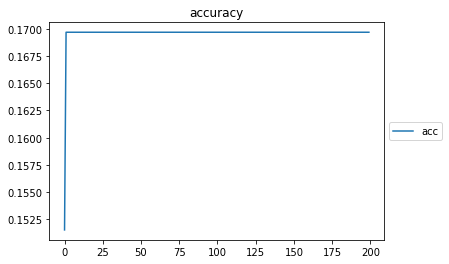

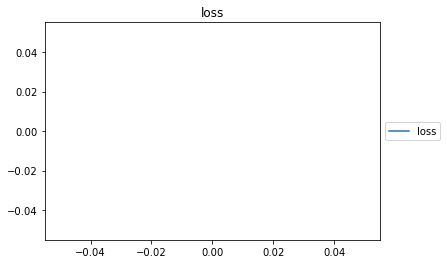

In [43]:
x = range(200)
plt.plot(x, history.history['accuracy'], label="acc")
plt.title("accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, history.history['loss'], label="loss")
plt.title("loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [14]:
model.save_weights('model.h5')

In [45]:
count = 0
prize_money_sum = 0
number_of_times = 80
for i in range(number_of_times):
    x=data_train[i:i+1]
    classes = model.predict_classes(x, batch_size=1)
    prob = model.predict_proba(x, batch_size=1)
    odd = odds[i:i+1].values
    horse_number = horse_number_first[i:i+1].values
    #num = re.sub("\\D", "",odd[0])
    if horse_number[0] == classes[0]:
        prize_money_sum += int(re.sub("\\D", "",odd[0]))
        count+=1
print("的中率")
print((count/number_of_times)*number_of_times)
print("回収率")
print((prize_money_sum/(number_of_times*100))*100)
    

    #print('classified:')

    #print(classes[0])
    #print('output probability:')
    #print(prob)

的中率
0.0
回収率
0.0
